In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

# merge TPM - expr_mat

In [ ]:
%%bash

cd ~/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/2_expression_value
paste <(gtf_to_table.py -l 9 -f transcript RNA_seq_5mpf_ovary_rep1_ensGene_coverage.ExonUniq.gtf | grep -v '#' | cut -f 10,13 | sort -k1,1 - ) \
      <(gtf_to_table.py -l 9 -f transcript RNA_seq_ovary_rep2_ensGene_coverage.ExonUniq.gtf | grep -v '#' | cut -f 10,13 | sort -k1,1 - | cut -f 2 ) | paste - <(gtf_to_table.py -l 9 -f transcript RNA_seq_oocyte_rep1_ensGene_coverage.ExonUniq.gtf | grep -v '#' | cut -f 10,13 | sort -k1,1 - | cut -f 2 ) | paste - <(gtf_to_table.py -l 9 -f transcript RNA_seq_oocyte_rep2_ensGene_coverage.ExonUniq.gtf | grep -v '#' | cut -f 10,13 | sort -k1,1 - | cut -f 2 ) | paste - <(gtf_to_table.py -l 9 -f transcript RNA_seq_oocyte_stage1_ensGene_coverage.ExonUniq.gtf | grep -v '#' | cut -f 10,13 | sort -k1,1 - | cut -f 2 ) | paste - <(gtf_to_table.py -l 9 -f transcript RNA_seq_oocyte_stage2_ensGene_coverage.ExonUniq.gtf | grep -v '#' | cut -f 10,13 | sort -k1,1 - | cut -f 2 ) | paste - <(gtf_to_table.py -l 9 -f transcript RNA_seq_oocyte_stage3_ensGene_coverage.ExonUniq.gtf | grep -v '#' | cut -f 10,13 | sort -k1,1 - | cut -f 2 ) | paste - <(gtf_to_table.py -l 9 -f transcript RNA_seq_oocyte_stage4_ensGene_coverage.ExonUniq.gtf | grep -v '#' | cut -f 10,13 | sort -k1,1 - | cut -f 2 ) | paste - <(gtf_to_table.py -l 9 -f transcript 

In [34]:
rep_name_table = [
    ['npm2a_oocyte_20200904', 'npm2a_oocyte_rep1'],
    ['npm2a_oocyte_20200904-2', 'npm2a_oocyte_rep2'],
    ['wt_oocyte_20200703', 'wt_oocyte_rep1'],
    ['wt_oocyte_20200703-2', 'wt_oocyte_rep2'],
    
    ['npm2a_64_20200515', 'npm2a_64_rep1'],
    ['npm2a_64_20200531', 'npm2a_64_rep2'],
    ['wt_64_20190503', 'wt_64_rep1'],
    ['wt_64_20190607', 'wt_64_rep2'], 
    
#     ['npm2a_1k_20181022', 'npm2a_1k_rep1'],
    ['npm2a_1k_20200515', 'npm2a_1k_rep1'],
    ['npm2a_1k_20200531', 'npm2a_1k_rep2'],
#     ['wt_1k_20181022', 'wt_1k_rep1'],
#     ['wt_1k_20190503', 'wt_1k_rep2'],
    ['wt_1k_20190607', 'wt_1k_rep1'],
    ['wt_1k_20200515', 'wt_1k_rep2'],

    ['npm2a_oblong_20200515', 'npm2a_oblong_rep1'],
    ['npm2a_oblong_20200531', 'npm2a_oblong_rep2'],
#     ['wt_oblong_20190503', 'wt_oblong_rep1'],
    ['wt_oblong_20190607', 'wt_oblong_rep1'],
    ['wt_oblong_20200515', 'wt_oblong_rep2'],
]

In [48]:
# add cmd lines to runned.sh
run = True

if run == True :
    os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/2_expression_value')
    with open('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/bin/make9_runned_mergeExpr.sh', 'w') as cmd_fi :
        cmd_fi.write('#!/bin/bash')
        for expression_type in ['TPM'] :
            column = '13' if expression_type == 'FPKM' else '14'
            i = 0
            for rep, name in rep_name_table :
                gtffi = f'RNA_seq_{rep}_ensGene_coverage.gtf'
                if i == 0 :
                    cmd = 'paste' +f' <(gtf_to_table.py -l 9 -f transcript {gtffi} | grep -v ' + "'#'" +f' | cut -f 10,{column} | sort -k1,1 - )'
                    cmd2 = 'cat <(echo transcript_id' + "$'\\t'" + name +"$'\\t'"
                else :
                    cmd += f' <(gtf_to_table.py -l 9 -f transcript {gtffi} | grep -v ' + "'#'" + f' | cut -f 10,{column} | sort -k1,1 - | cut -f 2 ) | paste -'
                    cmd2 += name + "$'\\t'"

                i += 1
            cmd = cmd[:-10] + f' > ../analysis/TPM_mat.tmp'
            cmd2 = cmd2[:-5] + f') ../analysis/TPM_mat.tmp > ../analysis/TPM_mat.tsv'
            cmd_fi.write('\ncd ~/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/2_expression_value')
            cmd_fi.write('\n' + cmd)
            cmd_fi.write('\ncd ~/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis')
            cmd_fi.write('\n' + cmd2 + '\n')



In [ ]:
%%bash
cd ~/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/bin
# bash make9_runned_mergeExpr.sh

In [54]:
input_TPM = pd.read_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/TPM_mat.tsv',
    sep = "\t",
)

input_TPM = input_TPM.set_index('transcript_id')

# PCA

## total

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(input_TPM.values.T)

PCA(n_components=2)

In [56]:
X_new = pca.transform(input_TPM.values.T)
X_new.shape

(16, 2)

In [57]:
X_new

array([[ 8.17451985e+04,  2.62391983e+02],
       [ 9.03031929e+04, -5.52109372e-01],
       [-5.51829251e+03,  1.12971100e+04],
       [ 7.47742354e+02,  2.18653190e+04],
       [ 1.44573206e+04, -3.97577713e+03],
       [ 1.57112781e+04, -4.72620767e+03],
       [-5.47594885e+04, -2.53224718e+02],
       [-5.45385669e+04, -1.07804836e+03],
       [ 6.91292485e+03, -1.93057408e+03],
       [ 1.62880808e+04, -5.97800205e+03],
       [-5.49692823e+04, -4.56064771e+03],
       [-2.70986311e+04,  3.38465175e+03],
       [ 1.10655280e+04, -6.27654946e+03],
       [ 2.04946374e+04, -6.50519844e+03],
       [-5.49071725e+04, -4.67874239e+03],
       [-5.93446976e+03,  3.15405144e+03]])

In [62]:
for i, name in enumerate(input_TPM.columns) :
    print(i, name)

0 npm2a_oocyte_rep1
1 npm2a_oocyte_rep2
2 wt_oocyte_rep1
3 wt_oocyte_rep2
4 npm2a_64_rep1
5 npm2a_64_rep2
6 wt_64_rep1
7 wt_64_rep2
8 npm2a_1k_rep1
9 npm2a_1k_rep2
10 wt_1k_rep1
11 wt_1k_rep2
12 npm2a_oblong_rep1
13 npm2a_oblong_rep2
14 wt_oblong_rep1
15 wt_oblong_rep2


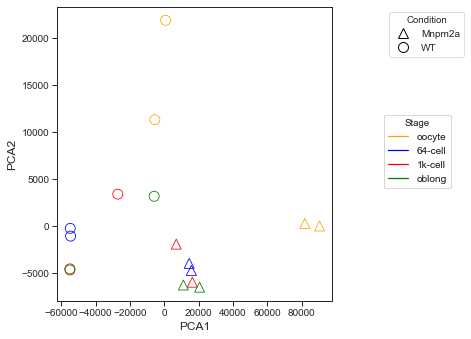

In [66]:
from adjustText import adjust_text

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize=(6.4,4.8))
    scatters = [
                ax.scatter(np.concatenate(([np.nan], X_new[[0,1,4,5,8,9,12,13],0])), 
                           np.concatenate(([np.nan], X_new[[0,1,4,5,8,9,12,13],1])),
                          color=['black',
                                 'orange', 'orange',
                                 'blue', 'blue',
                                 'red', 'red',
                                 'green', 'green',
                                ],
                           marker='^',
                           facecolors='none',
                           s = 100,
                           label='Mnpm2a'
                          ),
                ax.scatter(np.concatenate(([np.nan], X_new[[2,3,6,7,10,11,14,15],0])), 
                           np.concatenate(([np.nan], X_new[[2,3,6,7,10,11,14,15],1])),
                          color=['black',
                                 'orange', 'orange',
                                 'blue', 'blue',
                                 'red', 'red',
                                 'green', 'green',
                                ],
                           marker='o',
                           facecolors='none',
                           s = 100,
                           label='WT'
                          ),     
               ]
#     texts = []
#     for i in range(X_new.shape[0]):
#         texts += [ax.text( 
#                           X_new[i,0], X_new[i,1],
#                           input_TPM.columns[i],
#                    )]
#     adjust_text(texts, arrowprops=dict(arrowstyle='-', color='green'))

#     l2 = ax.legend(loc='upper right', title = 'Condition', bbox_to_anchor=(.99, 1))

    import matplotlib.lines as mlines
    npm2a = mlines.Line2D([], [], color='black', marker='^', linestyle='none', mfc='none',
                          markersize=10, label='Mnpm2a')
    wt = mlines.Line2D([], [], color='black', marker='o', linestyle='none', mfc='none',
                          markersize=10, label='WT')
    
    l2 = ax.legend(handles=[npm2a, wt], title = 'Condition', loc = 'upper right', bbox_to_anchor=(1.5, 1))

    ax.add_artist(l2)

    
    soocyte = mlines.Line2D([], [], color='orange', marker=None, linestyle='-', mfc='none',
                          markersize=10, label='oocyte')
    s64 = mlines.Line2D([], [], color='blue', marker=None, linestyle='-', mfc='none',
                          markersize=10, label='64-cell')
    s1k = mlines.Line2D([], [], color='red', marker=None, linestyle='-', mfc='none',
                          markersize=10, label='1k-cell')
    soblong = mlines.Line2D([], [], color='green', marker=None, linestyle='-', mfc='none',
                          markersize=10, label='oblong')

    l1 = ax.legend(handles=[soocyte, s64, s1k, soblong], title = 'Stage', loc = 'upper right', bbox_to_anchor=(1.45, 0.65))
    ax.add_artist(l1)
    
#     ax.set_xlim(-30000,30000)
#     ax.set_ylim(-9000,11000)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    fig.subplots_adjust(right=.8)
    plt.tight_layout(rect=[0,0,0.75,1])

#     ax.set_title('PCA of gene expression levels under different condition')
#     fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make9_PCA_expression_npm2a.pdf',
                transparent=True)


## oocyte only

In [83]:
input_TPM_oocyte = input_TPM[['npm2a_oocyte_rep1', 'npm2a_oocyte_rep2', 'wt_oocyte_rep1', 'wt_oocyte_rep1']]

In [87]:
input_TPM_oocyte

,npm2a_oocyte_rep1,npm2a_oocyte_rep2,wt_oocyte_rep1,wt_oocyte_rep1
transcript_id,,,,
ENSDART00000000004.5,8.520701,7.431166,8.624373,8.624373
ENSDART00000000005.7,1.024967,0.733045,1.757980,1.757980
ENSDART00000000042.11,459.977264,455.128815,373.738953,373.738953
ENSDART00000000069.8,72.523178,63.763226,26.886013,26.886013
ENSDART00000000070.7,159.322525,167.249451,250.365891,250.365891
...,...,...,...,...
ENSDART00000194999.1,0.000000,0.000000,0.000000,0.000000
ENSDART00000195000.1,0.000000,0.000000,0.000000,0.000000
ENSDART00000195001.1,0.000000,0.000000,0.000000,0.000000


In [84]:
from sklearn.decomposition import PCA
pca_oocyte = PCA(n_components=2)
pca_oocyte.fit(input_TPM_oocyte.values.T)

PCA(n_components=2)

In [85]:
X_new_oocyte = pca_oocyte.transform(input_TPM_oocyte.values.T)
X_new_oocyte.shape

(4, 2)

In [86]:
for i, name in enumerate(input_TPM_oocyte.columns) :
    print(i, name)

0 npm2a_oocyte_rep1
1 npm2a_oocyte_rep2
2 wt_oocyte_rep1
3 wt_oocyte_rep1


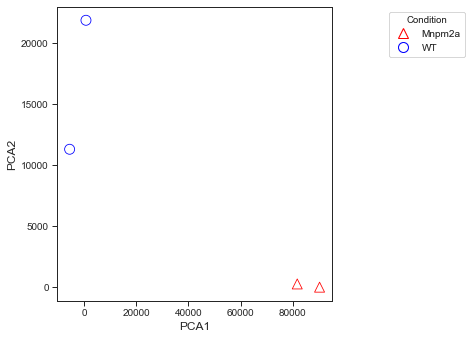

In [91]:
from adjustText import adjust_text

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize=(6.4,4.8))
    scatters = [
                ax.scatter(np.concatenate(([np.nan], X_new[[0,1],0])), 
                           np.concatenate(([np.nan], X_new[[0,1],1])),
                          color=['black',
                                 'red', 'red',
                                ],
                           marker='^',
                           facecolors='none',
                           s = 100,
                           label='Mnpm2a'
                          ),
                ax.scatter(np.concatenate(([np.nan], X_new[[2,3],0])), 
                           np.concatenate(([np.nan], X_new[[2,3],1])),
                          color=['black',
                                 'blue', 'blue',
                                ],
                           marker='o',
                           facecolors='none',
                           s = 100,
                           label='WT'
                          ),     
               ]
#     texts = []
#     for i in range(X_new.shape[0]):
#         texts += [ax.text( 
#                           X_new[i,0], X_new[i,1],
#                           input_TPM.columns[i],
#                    )]
#     adjust_text(texts, arrowprops=dict(arrowstyle='-', color='green'))

#     l2 = ax.legend(loc='upper right', title = 'Condition', bbox_to_anchor=(.99, 1))

    import matplotlib.lines as mlines
    npm2a = mlines.Line2D([], [], color='red', marker='^', linestyle='none', mfc='none',
                          markersize=10, label='Mnpm2a')
    wt = mlines.Line2D([], [], color='blue', marker='o', linestyle='none', mfc='none',
                          markersize=10, label='WT')
    
    l2 = ax.legend(handles=[npm2a, wt], title = 'Condition', loc = 'upper right', bbox_to_anchor=(1.5, 1))

    ax.add_artist(l2)

    
#     ax.set_xlim(-30000,30000)
#     ax.set_ylim(-9000,11000)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    fig.subplots_adjust(right=.8)
    plt.tight_layout(rect=[0,0,0.75,1])

#     ax.set_title('PCA of gene expression levels under different condition')
#     fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make9_PCA_expression_npm2a_oocyte.pdf',
                transparent=True)


# correlation

## total stages

In [69]:
corr_TPM = input_TPM.corr()

/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


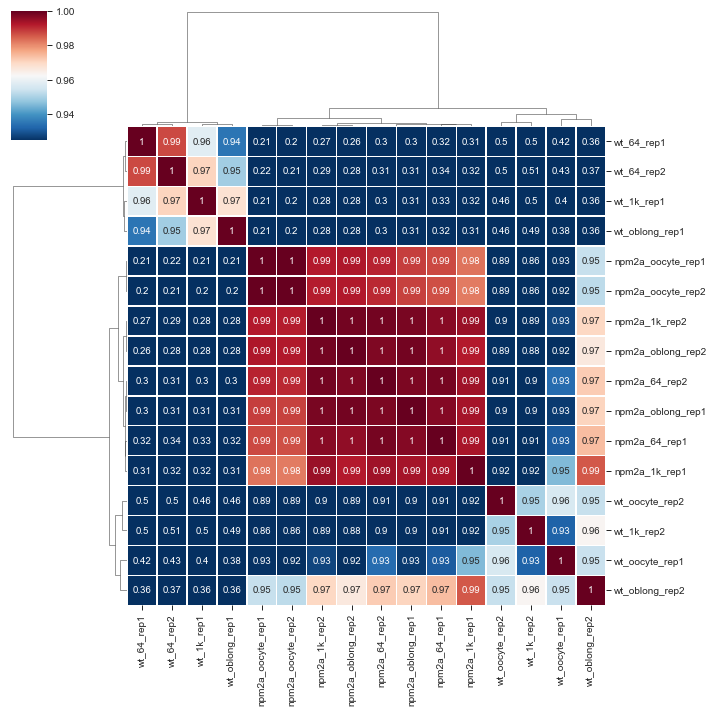

In [70]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    

    colors = ['#FFFFFF', '#FF0000', ]
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list("mycmap", colors)

    # Draw the heatmap with the mask and correct aspect ratio\
    g = sns.clustermap(corr_TPM,
                #mask=mask,
                cmap='RdBu_r',
                vmin=0.925,
                vmax=1,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .5},
                annot=True,
                )
    g.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make9_heatmap_corr_RNA_seq_Mnpm2a_WT.pdf',
              transparent=True)
    
    

## oocyte

In [71]:
corr_TPM

,npm2a_oocyte_rep1,npm2a_oocyte_rep2,wt_oocyte_rep1,wt_oocyte_rep2,npm2a_64_rep1,npm2a_64_rep2,wt_64_rep1,wt_64_rep2,npm2a_1k_rep1,npm2a_1k_rep2,wt_1k_rep1,wt_1k_rep2,npm2a_oblong_rep1,npm2a_oblong_rep2,wt_oblong_rep1,wt_oblong_rep2
npm2a_oocyte_rep1,1.000000,0.999778,0.925435,0.889930,0.987384,0.991392,0.214683,0.223805,0.982822,0.992193,0.209979,0.860026,0.988483,0.992768,0.207528,0.953940
npm2a_oocyte_rep2,0.999778,1.000000,0.921458,0.886809,0.986753,0.990867,0.204824,0.214440,0.982125,0.991880,0.201008,0.856840,0.988043,0.992664,0.199360,0.952747
wt_oocyte_rep1,0.925435,0.921458,1.000000,0.956415,0.931324,0.933727,0.424549,0.426555,0.945918,0.928059,0.396023,0.932276,0.926484,0.922088,0.380545,0.954200
wt_oocyte_rep2,0.889930,0.886809,0.956415,1.000000,0.914750,0.906104,0.495466,0.499241,0.921821,0.897191,0.462831,0.950434,0.901217,0.894092,0.456192,0.954001
npm2a_64_rep1,0.987384,0.986753,0.931324,0.914750,1.000000,0.998415,0.322070,0.335005,0.993338,0.996536,0.326619,0.906723,0.997028,0.995639,0.323598,0.974047
npm2a_64_rep2,0.991392,0.990867,0.933727,0.906104,0.998415,1.000000,0.297157,0.309303,0.994329,0.998562,0.302548,0.899367,0.997939,0.997640,0.297685,0.972076
wt_64_rep1,0.214683,0.204824,0.424549,0.495466,0.322070,0.297157,1.000000,0.987273,0.306716,0.272973,0.958318,0.499070,0.295348,0.264300,0.935203,0.361063
wt_64_rep2,0.223805,0.214440,0.426555,0.499241,0.335005,0.309303,0.987273,1.000000,0.319114,0.285204,0.970775,0.508606,0.307435,0.276290,0.949523,0.371791
npm2a_1k_rep1,0.982822,0.982125,0.945918,0.921821,0.993338,0.994329,0.306716,0.319114,1.000000,0.994803,0.316914,0.924042,0.993618,0.992179,0.312070,0.985789
npm2a_1k_rep2,0.992193,0.991880,0.928059,0.897191,0.996536,0.998562,0.272973,0.285204,0.994803,1.000000,0.283315,0.890937,0.998165,0.998701,0.280008,0.970155


In [73]:
corr_TPM_oocyte = corr_TPM[['npm2a_oocyte_rep1','npm2a_oocyte_rep2','wt_oocyte_rep1','wt_oocyte_rep2']].T[['npm2a_oocyte_rep1','npm2a_oocyte_rep2','wt_oocyte_rep1','wt_oocyte_rep2']]
corr_TPM_oocyte

,npm2a_oocyte_rep1,npm2a_oocyte_rep2,wt_oocyte_rep1,wt_oocyte_rep2
npm2a_oocyte_rep1,1.000000,0.999778,0.925435,0.889930
npm2a_oocyte_rep2,0.999778,1.000000,0.921458,0.886809
wt_oocyte_rep1,0.925435,0.921458,1.000000,0.956415
wt_oocyte_rep2,0.889930,0.886809,0.956415,1.000000


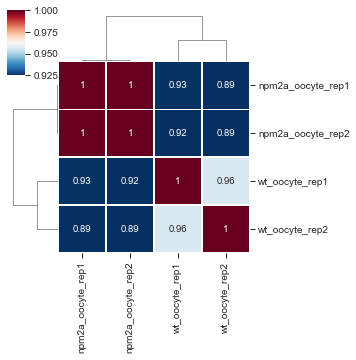

In [76]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    

    colors = ['#FFFFFF', '#FF0000', ]
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list("mycmap", colors)

    # Draw the heatmap with the mask and correct aspect ratio\
    g = sns.clustermap(corr_TPM_oocyte,
                #mask=mask,
                cmap='RdBu_r',
                vmin=0.925,
                vmax=1,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .5},
                annot=True,
                figsize=(5, 5),
                )
    g.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make9_heatmap_corr_RNA_seq_Mnpm2a_WT.pdf',
              transparent=True)
    
    

In [ ]:
## fertilization, oocyte development

In [78]:
from Bio.UniProt.GOA import gafiterator
from goatools.obo_parser import GODag
from goatools.base import download_go_basic_obo


In [79]:
# define the GO term of interest
GO_term = 'GO:0043066'

# download the latest version of the GO ontology in OBO format
obo_file = download_go_basic_obo()

# load the GO ontology into memory
go_dag = GODag(obo_file)

# read in the GAF file containing gene-GO term associations
file = open('gene_association.goa_human', 'rt')
gene_annotations = gafiterator(file)

# create a set of gene symbols associated with the GO term of interest
gene_set = set()
for annotation in gene_annotations:
    if annotation['DB_Object_ID'] in go_dag[GO_term].children:
        gene_set.add(annotation['DB_Object_Symbol'])

# print the gene symbols
print(gene_set)


$ get http://purl.obolibrary.org/obo/go/go-basic.obo
requests.get(http://purl.obolibrary.org/obo/go/go-basic.obo, stream=True)
  WROTE: go-basic.obo

go-basic.obo: fmt(1.2) rel(2023-03-06) 46,579 Terms


FileNotFoundError: [Errno 2] No such file or directory: 'gene_association.goa_human'

In [81]:
import ftplib

ftp = ftplib.FTP("ftp.ebi.ac.uk")
ftp.login() # enter your login credentials, if required
ftp.cwd("pub/databases/GO/annotations")

with open("/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/gene_association.goa_human", "wb") as file:
    ftp.retrbinary("RETR goa_human.gaf", file.write)

ftp.quit()


error_perm: 550 Failed to change directory.